### Test

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:

def npy_to_csv(npy_path, csv_path, feature_names=None):
    data = np.load(npy_path)
    num_samples, pred_len, num_features = data.shape
    data_2d = data.reshape(num_samples * pred_len, num_features)

    if feature_names is None:
        feature_names = [f'feature_{i}' for i in range(num_features)]

    df = pd.DataFrame(data_2d, columns=feature_names)
    df.to_csv(csv_path, index=False)
    print(f"Saved CSV to: {csv_path}")


In [22]:
base_path = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results"

matches = [
    folder for folder in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, folder)) and
       #all(key in folder for key in ["TCN", "weather_", "336_336", "CI_g", "deg", "lag_336"])
       all(key in folder for key in ["Linear", "weather_", "336_336", "Del", "deg", "lag_336"])
       #all(key in folder for key in ["TCN", "ETTh2", "720", "CD"]) 
       #and all(exclude_key not in folder for exclude_key in ["lag"])
]

matches.sort()

for match in matches:
    print(match)

_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chDelta_cdwd0.0_Exp_0
_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chDelta_cdwd0.0_df1.0_p20_sk0_Exp_0


### Weather, Channel-wise, ModernTCN CD

In [23]:
path = "weather_336_720_ModernTCN_custom_ftM_sl336_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0"

base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [path.replace(".npy", ".csv") for path in npy_paths]

for npy_path in npy_paths:
    csv_path = npy_path.replace(".npy", ".csv")
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)


df_true = pd.read_csv(csv_paths[0], nrows=500)
df_pred = pd.read_csv(csv_paths[1], nrows=500)

# First, count the number of rows in the file
with open(csv_paths[0]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header

# Then read only the last 720 rows
skip = max(total_rows - 720, 0)
df_true = pd.read_csv(csv_paths[0], skiprows=range(1, skip + 1))

# First, count the number of rows in the file
with open(csv_paths[1]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header

# Then read only the last 720 rows
skip = max(total_rows - 720, 0)
df_pred = pd.read_csv(csv_paths[1], skiprows=range(1, skip + 1))

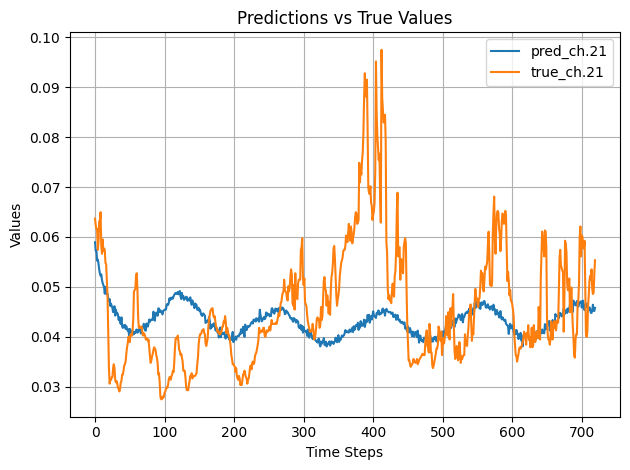

In [24]:
channel = 21

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather_ch-"+str(channel)+"_ModernTCN-CD-720.png")
plt.show()

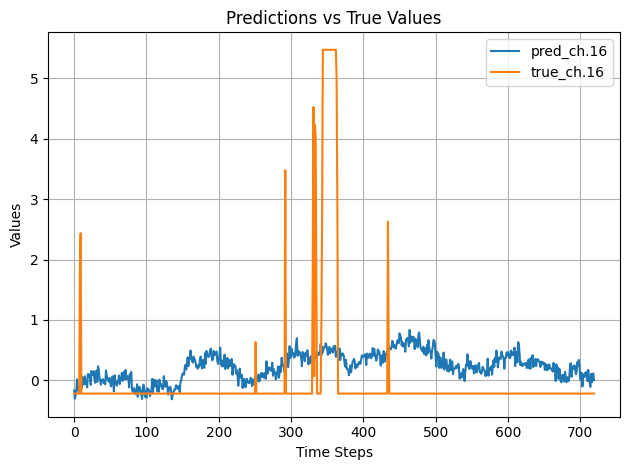

In [25]:
channel = 16

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather_ch-"+str(channel)+"_ModernTCN-CD-720.png")
plt.show()

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
45496,2020-11-12 00:10:00,996.42,7.59,281.02,7.23,97.6,10.44,10.19,0.25,6.38,...,1.39,2.05,194.1,0.0,0.0,0.0,0.0,0.0,18.42,480.7
45497,2020-11-12 00:20:00,996.36,7.56,281.00,7.20,97.6,10.42,10.17,0.25,6.37,...,1.78,2.33,198.0,0.0,0.0,0.0,0.0,0.0,18.38,480.6
45498,2020-11-12 00:30:00,996.23,7.50,280.96,7.18,97.8,10.38,10.15,0.23,6.36,...,1.50,2.10,195.8,0.0,0.0,0.0,0.0,0.0,18.32,480.0
45499,2020-11-12 00:40:00,996.10,7.45,280.91,7.17,98.1,10.34,10.15,0.20,6.36,...,1.89,2.93,192.0,0.0,0.0,0.0,0.0,0.0,18.27,480.5
45500,2020-11-12 00:50:00,995.96,7.42,280.89,7.15,98.2,10.32,10.13,0.19,6.35,...,1.94,3.05,188.1,0.0,0.0,0.0,0.0,0.0,18.22,479.4


raining (s)
22


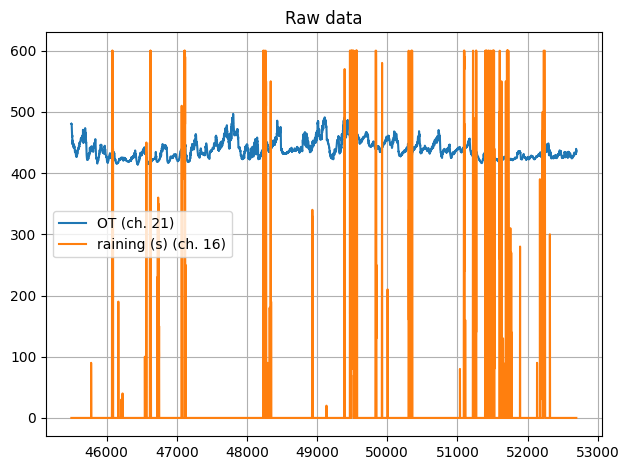

In [26]:
### Rohdaten Check

df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/weather.csv")

df = df.iloc[-7200:] 

display(df.head())

print(df.columns[16])
print(len(df.columns))
plt.plot(df["OT"], label='OT (ch. 21)')
plt.plot(df["raining (s)"], label='raining (s) (ch. 16)')

plt.title('Raw data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather_rawdata.png")
plt.show()

### Weather, Channel-wise, ModernTCN CD

In [27]:
path = "ETTh2_336_720_ModernTCN_ETTh2_ftM_sl336_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCD_cdwd0.0_Exp_0"

base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [path.replace(".npy", ".csv") for path in npy_paths]

for npy_path in npy_paths:
    csv_path = npy_path.replace(".npy", ".csv")
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)


df_true = pd.read_csv(csv_paths[0], nrows=500)
df_pred = pd.read_csv(csv_paths[1], nrows=500)

# First, count the number of rows in the file
with open(csv_paths[0]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header

# Then read only the last 720 rows
skip = max(total_rows - 720, 0)
df_true = pd.read_csv(csv_paths[0], skiprows=range(1, skip + 1))

# First, count the number of rows in the file
with open(csv_paths[1]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header

# Then read only the last 720 rows
skip = max(total_rows - 720, 0)
df_pred = pd.read_csv(csv_paths[1], skiprows=range(1, skip + 1))

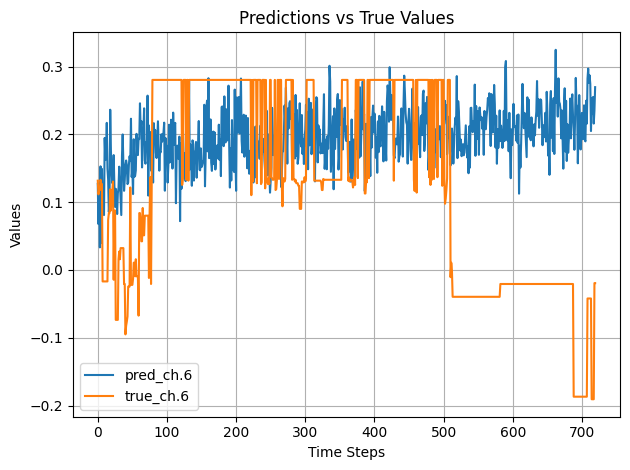

In [28]:
channel = 6

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/etth2_ch-"+str(channel)+"_ModernTCN-CD-720.png")
plt.show()

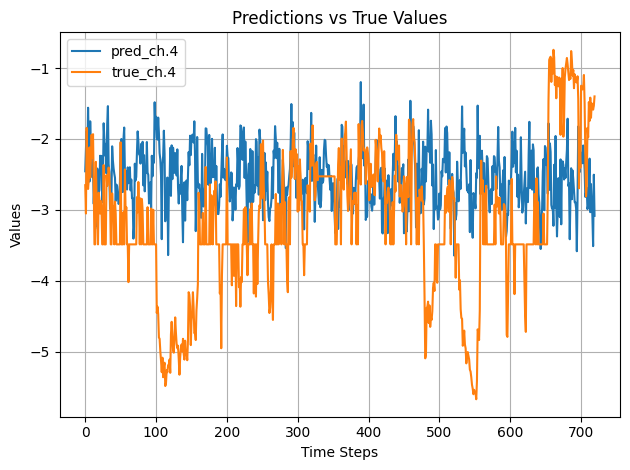

In [29]:
channel = 4

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/etth2_ch-"+str(channel)+"_ModernTCN-CD-720.png")
plt.show()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
10220,2017-08-30 20:00:00,39.286999,10.890,40.021000,10.133,0.000,0.0,32.949001
10221,2017-08-30 21:00:00,40.292000,11.476,42.380001,10.990,-1.343,0.0,32.949001
10222,2017-08-30 22:00:00,41.549000,12.565,42.407001,10.883,0.000,0.0,32.509998
10223,2017-08-30 23:00:00,38.617001,12.063,39.860001,11.205,0.000,0.0,32.070000
10224,2017-08-31 00:00:00,34.094002,8.963,36.402000,8.980,-1.951,0.0,31.850500


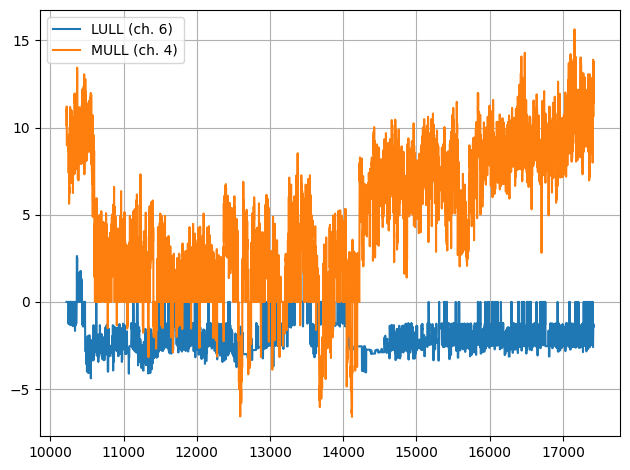

In [30]:
### Rohdaten Check

df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/ETTh2.csv")

df = df.iloc[-7200:] 

display(df.head())

plt.plot(df["LULL"], label='LULL (ch. 6)')
plt.plot(df["MULL"], label='MULL (ch. 4)')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/ETTh2_rawdata.png")
plt.show()

### Lag, Linear & ModernTCN

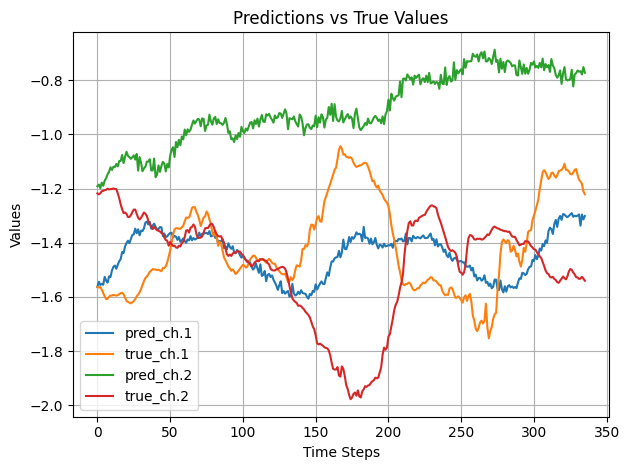

In [31]:
path = "_weather_shower_lag_336_T_degC_336_336_ModernTCN_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0"
path = "_weather_shower_lag_336_T_degC_336_336_ModernTCN_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0"
path = "_weather_shower_lag_336_T_degC_336_336_ModernTCN_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCD_cdwd0.0_df0.5_p20_sk0_Exp_0"
path = "_weather_shower_lag_336_T_degC_336_336_ModernTCN_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2024_chCI_glob_cdwd0.0_df0.5_p20_sk0_Exp_0"

base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [path.replace(".npy", ".csv") for path in npy_paths]

for npy_path in npy_paths:
    csv_path = npy_path.replace(".npy", ".csv")
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)

df_true = pd.read_csv(csv_paths[0], nrows=500)
df_pred = pd.read_csv(csv_paths[1], nrows=500)

# First, count the number of rows in the file
with open(csv_paths[0]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_true = pd.read_csv(csv_paths[0], skiprows=range(1, skip + 1))

# First, count the number of rows in the file
with open(csv_paths[1]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_pred = pd.read_csv(csv_paths[1], skiprows=range(1, skip + 1))

channel = 1

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

channel = 2

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather-lag336_ch-1_2_ModernTCN-CD-336.png")
plt.show()

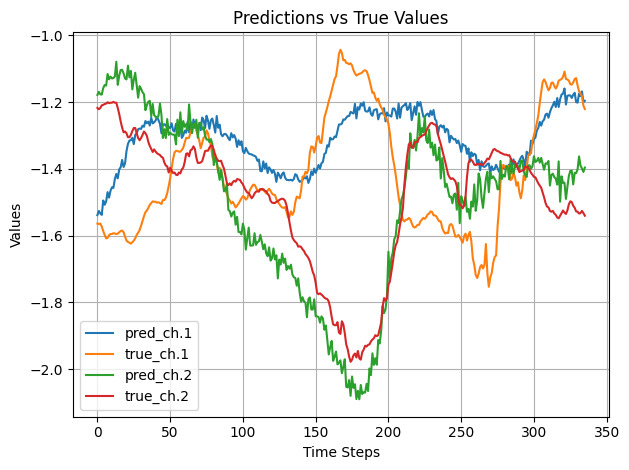

In [32]:
path = "_weather_shower_lag_336_T_degC_336_336_ModernTCN_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCD_cdwd0.0_df0.5_p20_sk0_Exp_0"

base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [path.replace(".npy", ".csv") for path in npy_paths]

for npy_path in npy_paths:
    csv_path = npy_path.replace(".npy", ".csv")
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)

df_true = pd.read_csv(csv_paths[0], nrows=500)
df_pred = pd.read_csv(csv_paths[1], nrows=500)

# First, count the number of rows in the file
with open(csv_paths[0]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_true = pd.read_csv(csv_paths[0], skiprows=range(1, skip + 1))

# First, count the number of rows in the file
with open(csv_paths[1]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_pred = pd.read_csv(csv_paths[1], skiprows=range(1, skip + 1))

channel = 1

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

channel = 2

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather-lag336_ch-1_2_ModernTCN-CD-336.png")
plt.show()

,date,T_degC,T_degC_LAG
49976,2020-12-18 02:50:00,0.51,6.51
49977,2020-12-18 03:00:00,0.43,6.56
49978,2020-12-18 03:10:00,0.45,6.61
49979,2020-12-18 03:20:00,0.52,6.41
49980,2020-12-18 03:30:00,0.46,6.27


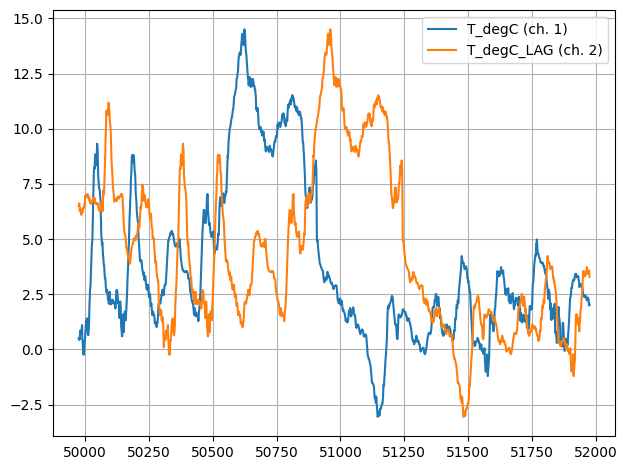

In [33]:
### Rohdaten Check

df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/_weather_shower_lag_336_T_degC.csv")

df = df.iloc[-2000:] 

display(df.head())

plt.plot(df["T_degC"], label='T_degC (ch. 1)')
plt.plot(df["T_degC_LAG"], label='T_degC_LAG (ch. 2)')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather-lag336_rawdata.png")
plt.show()


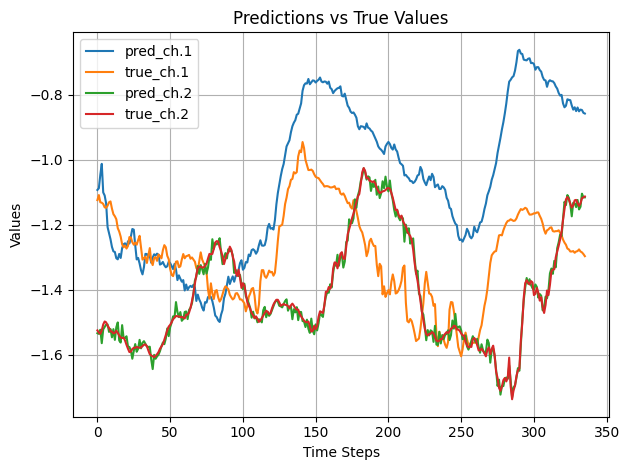

In [34]:
path = "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0"

base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [path.replace(".npy", ".csv") for path in npy_paths]

for npy_path in npy_paths:
    csv_path = npy_path.replace(".npy", ".csv")
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)

df_true = pd.read_csv(csv_paths[0], nrows=500)
df_pred = pd.read_csv(csv_paths[1], nrows=500)

# First, count the number of rows in the file
with open(csv_paths[0]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_true = pd.read_csv(csv_paths[0], skiprows=range(1, skip + 1))

# First, count the number of rows in the file
with open(csv_paths[1]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_pred = pd.read_csv(csv_paths[1], skiprows=range(1, skip + 1))

channel = 1

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

channel = 2

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather-lag336_ch-1_2_Linear-CD-336.png")
plt.show()

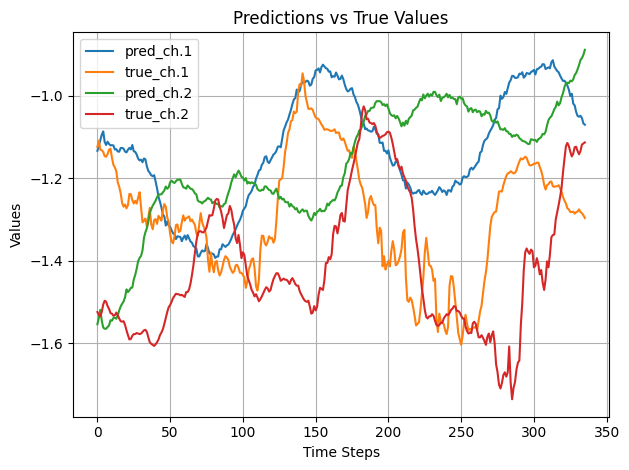

In [35]:

path = "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_loc_cdwd0.0_Exp_0"

base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [path.replace(".npy", ".csv") for path in npy_paths]

for npy_path in npy_paths:
    csv_path = npy_path.replace(".npy", ".csv")
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)

df_true = pd.read_csv(csv_paths[0], nrows=500)
df_pred = pd.read_csv(csv_paths[1], nrows=500)

# First, count the number of rows in the file
with open(csv_paths[0]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_true = pd.read_csv(csv_paths[0], skiprows=range(1, skip + 1))

# First, count the number of rows in the file
with open(csv_paths[1]) as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header


skip = max(total_rows - 336, 0)
df_pred = pd.read_csv(csv_paths[1], skiprows=range(1, skip + 1))

channel = 1

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

channel = 2

plt.plot(df_pred[f"feature_{channel-1}"], label=f"pred_ch.{channel}")
plt.plot(df_true[f"feature_{channel-1}"], label=f"true_ch.{channel}")

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.savefig("plots/Predictions/weather-lag336_ch-1_2_Linear-CD-336.png")
plt.show()

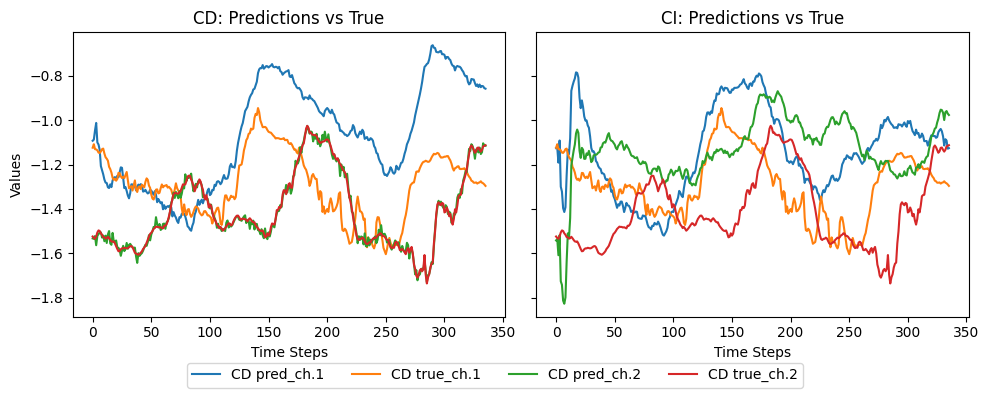

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_last_336(csv_path):
    with open(csv_path) as f:
        total_rows = sum(1 for _ in f) - 1  # subtract header
    skip = max(total_rows - 336, 0)
    return pd.read_csv(csv_path, skiprows=range(1, skip + 1))

# === Paths for both models ===
base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

paths = {
    "CD": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0",
    "CI": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_glob_cdwd0.0_Exp_0",
}

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ax, (label, path) in zip(axes, paths.items()):
    npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
    csv_paths = [p.replace(".npy", ".csv") for p in npy_paths]

    for npy_path, csv_path in zip(npy_paths, csv_paths):
        if not os.path.exists(csv_path):
            npy_to_csv(npy_path, csv_path)

    df_true = load_last_336(csv_paths[0])
    df_pred = load_last_336(csv_paths[1])

    for channel in [1, 2]:
        ax.plot(df_pred[f"feature_{channel - 1}"], label=f"{label} pred_ch.{channel}")
        ax.plot(df_true[f"feature_{channel - 1}"], label=f"{label} true_ch.{channel}")

    ax.set_title(f"{label}: Predictions vs True")
    ax.set_xlabel("Time Steps")
    #ax.grid()

# Shared Y label
axes[0].set_ylabel("Values")

# Shared Legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.00))

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for legend
os.makedirs("plots/Predictions", exist_ok=True)
plt.savefig("plots/Predictions/weather-lag336_ch-1_2_Linear-CD-CI_horizontal.png", bbox_inches='tight')
plt.show()


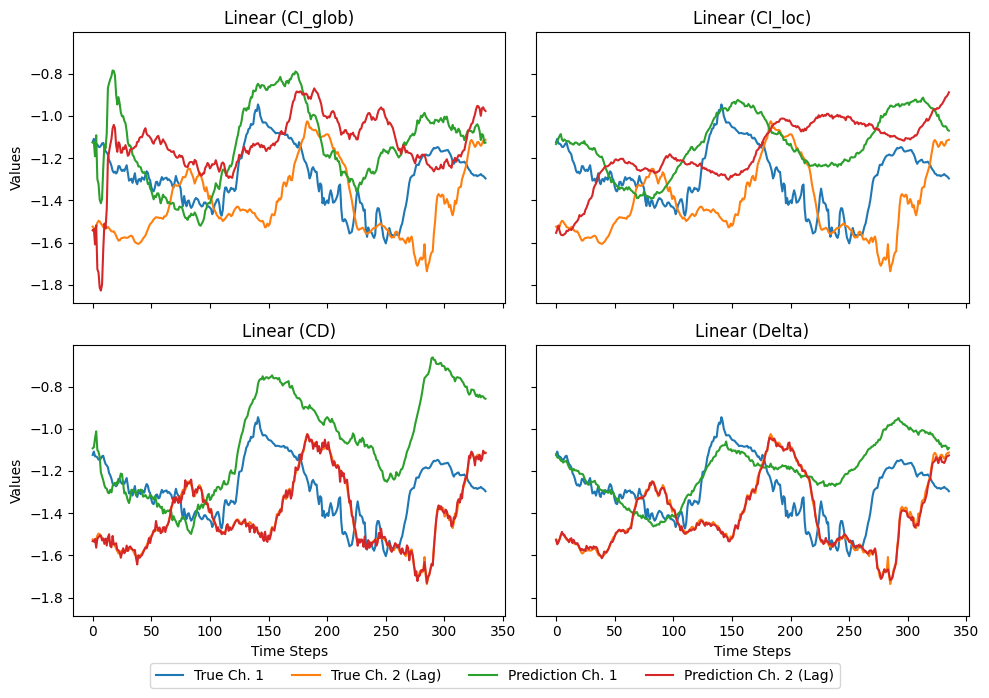

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_last_336(csv_path):
    with open(csv_path) as f:
        total_rows = sum(1 for _ in f) - 1  # subtract header
    skip = max(total_rows - 336, 0)
    return pd.read_csv(csv_path, skiprows=range(1, skip + 1))

# === Define paths for all 4 models ===
base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

paths = {
    "CI_glob": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_glob_cdwd0.0_Exp_0",
    "CI_loc": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_loc_cdwd0.0_Exp_0",
    "CD": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0",
    "Delta": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chDelta_cdwd0.0_Exp_0",
}

# === Setup subplots (2 rows, 2 cols) ===
fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()  # flatten for easy indexing

for ax, (label, path) in zip(axes, paths.items()):
    npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
    csv_paths = [p.replace(".npy", ".csv") for p in npy_paths]

    # Convert to CSV if missing
    for npy_path, csv_path in zip(npy_paths, csv_paths):
        if not os.path.exists(csv_path):
            npy_to_csv(npy_path, csv_path)

    # Load only last 336 steps
    df_true = load_last_336(csv_paths[0])
    df_pred = load_last_336(csv_paths[1])

    """

    for channel in [1, 2]:
        if channel == 2:
            suffix = " (Lag)"
        else:
            suffix = ""
            
        ax.plot(df_pred[f"feature_{channel - 1}"], label=f"Prediction Ch. {channel}{suffix}")
        ax.plot(df_true[f"feature_{channel - 1}"], label=f"True Ch. {channel}{suffix}")

    """

    ax.plot(df_true[f"feature_{1 - 1}"], label=f"True Ch. 1")
    ax.plot(df_true[f"feature_{2 - 1}"], label=f"True Ch. 2 (Lag)")

    ax.plot(df_pred[f"feature_{1 - 1}"], label=f"Prediction Ch. 1")
    ax.plot(df_pred[f"feature_{2 - 1}"], label=f"Prediction Ch. 2 (Lag)")
    
    ax.set_title(f"Linear ({label})")
    #ax.grid()

# Axis labels (shared where possible)
for ax in axes[:2]:
    ax.set_xlabel("")
for ax in axes[2:]:
    ax.set_xlabel("Time Steps")

for i in [0, 2]:
    axes[i].set_ylabel("Values")

# Shared Legend below all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.00))

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for legend
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig("plots/Thesis/Lag_336_Linear_336_predictions.png", bbox_inches='tight', dpi=300)
plt.show()


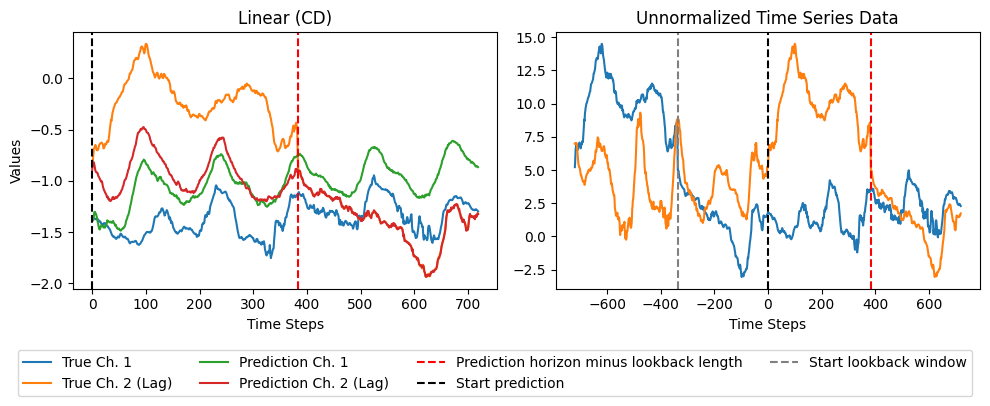

In [38]:
# --- Model prediction data ---
path = "_weather_shower_lag_720_T_degC_336_720_Linear_final_custom_ftM_sl336_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0"
base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"
npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [p.replace(".npy", ".csv") for p in npy_paths]

for npy_path, csv_path in zip(npy_paths, csv_paths):
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)

def load_last_steps(csv_path, steps):
    with open(csv_path) as f:
        total_rows = sum(1 for _ in f) - 1  # subtract header
    skip = max(total_rows - steps, 0)
    return pd.read_csv(csv_path, skiprows=range(1, skip + 1))


df_true = load_last_steps(csv_paths[0], steps=720)
df_pred = load_last_steps(csv_paths[1], steps=720)

# --- Raw data ---
raw_df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/_weather_shower_lag_720_T_degC.csv")
raw_df = raw_df[:-12]
raw_df = raw_df.iloc[-1440:].reset_index(drop=True)
raw_df.index = raw_df.index - 720

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

ch_label_pred = f"pred_ch.{1}"
ch_label_true = f"true_ch.{1}"




axes[0].plot(df_true[f"feature_{1-1}"], label=f"True Ch. 1")#, color=colors[ch_label_true])
axes[0].plot(df_true[f"feature_{2-1}"], label=f"True Ch. 2 (Lag)")#, color=colors[ch_label_true])

axes[0].plot(df_pred[f"feature_{1-1}"], label=f"Prediction Ch. 1")#, color=colors[ch_label_pred])
axes[0].plot(df_pred[f"feature_{2-1}"], label=f"Prediction Ch. 2 (Lag)")#, color=colors[ch_label_pred])


axes[0].axvline(x=(1440-336+1-721), color='red', linestyle='--', label='Prediction horizon minus lookback length')
axes[0].axvline(x=0, color='black', linestyle='--', label='Start prediction')
axes[0].set_title("Linear (CD)")
axes[0].set_xlabel("Time Steps")
axes[0].set_ylabel("Values")
#axes[0].grid()


# --- Subplot 2: Raw Data with Lookback Windows ---
axes[1].plot(raw_df["T_degC"], label=None)#, color=colors["true_ch.1"])
axes[1].plot(raw_df["T_degC_LAG"], label=None)#, color=colors["true_ch.2"])
axes[1].axvline(x=0, color='black', linestyle='--', label='Start prediction')
axes[1].axvline(x=(720-336+1-721), color='grey', linestyle='--', label='Start lookback window')
axes[1].axvline(x=(1440-336+1-721), color='red', linestyle='--', label='Prediction horizon minus lookback length')
axes[1].set_title("Unnormalized Time Series Data")
axes[1].set_xlabel("Time Steps")
#axes[1].grid()



# --- Shared Legend (no duplicates) ---
# Only take one copy of each label
seen = set()
combined_handles_labels = []

for ax in axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in seen:
            combined_handles_labels.append((h, l))
            seen.add(l)

handles, labels = zip(*combined_handles_labels)
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.12, 1, 1])
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig("plots/Thesis/Lag_720_Linear_720_predictions.png", bbox_inches='tight', dpi=300)
plt.show()

,date,T_degC,T_degC_LAG
331,2020-12-31 21:20:00,2.45,3.34
332,2020-12-31 21:30:00,2.40,3.40
333,2020-12-31 21:40:00,2.38,3.52
334,2020-12-31 21:50:00,2.34,3.54
335,2020-12-31 22:00:00,2.29,3.56


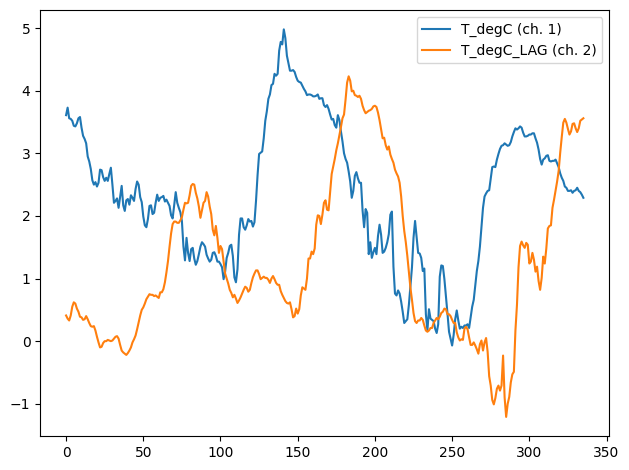

In [18]:
### Rohdaten Check

df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/_weather_shower_lag_336_T_degC.csv")

df = df[:-12]

#df = df.iloc[-1440:] 
df = df.iloc[-336:] 

df = df.reset_index(drop=True)
#df.index = df.index - 720

display(df.tail())

plt.plot(df["T_degC"], label='T_degC (ch. 1)')
plt.plot(df["T_degC_LAG"], label='T_degC_LAG (ch. 2)')

plt.legend()
#plt.grid()
plt.tight_layout()
#plt.savefig("plots/Predictions/weather-lag336_rawdata.png")
plt.show()


# Other

In [4]:
npy_paths = ["/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/national_illness_shower_lag_104_60_Linear_CD_custom_ftM_sl104_ll18_pl60_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/true.npy",
             "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/national_illness_shower_lag_104_60_Linear_CD_custom_ftM_sl104_ll18_pl60_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/pred.npy"]


npy_paths = ["/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/_weather_shower_lag_336_336_96_Linear_CD_custom_ftM_sl336_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/true.npy",
             "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/_weather_shower_lag_336_336_96_Linear_CD_custom_ftM_sl336_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/pred.npy"]


csv_paths = [path.replace(".npy", ".csv") for path in npy_paths]

for npy_path in npy_paths:
    csv_path = npy_path.replace(".npy", ".csv")
    npy_to_csv(npy_path, csv_path)

df_true = pd.read_csv(csv_paths[0])
df_pred = pd.read_csv(csv_paths[1])
#df_pred = df_pred.iloc[-480:]
df_pred = df_pred.iloc[-180:]
#df_pred = df_pred.iloc[:480] 
#df_true = df_true.iloc[-480:]
df_true = df_true.iloc[-180:]
#df_true = df_true.iloc[:480]

Saved CSV to: /pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/_weather_shower_lag_336_336_96_Linear_CD_custom_ftM_sl336_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/true.csv
Saved CSV to: /pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/_weather_shower_lag_336_336_96_Linear_CD_custom_ftM_sl336_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/pred.csv


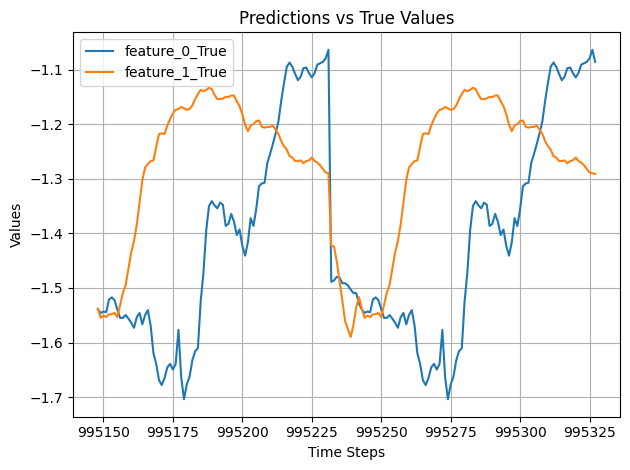

In [5]:
#plt.plot(df_pred['feature_0'], label='feature_0')
#plt.plot(df_pred['feature_1'], label='feature_1')
plt.plot(df_true['feature_0'], label='feature_0_True')
plt.plot(df_true['feature_1'], label='feature_1_True')

plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Values')   
plt.title('Predictions vs True Values')
plt.grid()
plt.tight_layout()
plt.show()

,date,T_degC,T_degC_LAG
51360,2020-12-25 01:30:00,2.83,12.10
51361,2020-12-25 01:40:00,2.85,11.97
51362,2020-12-25 01:50:00,2.86,12.09
51363,2020-12-25 02:00:00,2.89,12.19
51364,2020-12-25 02:10:00,2.87,12.24


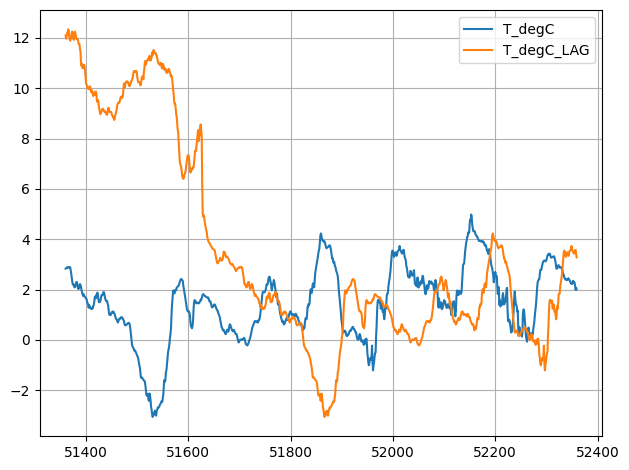

In [6]:
df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/_national_illness_shower_lag_60.csv")
df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/_weather_shower_lag_336.csv")

#df = df.iloc[-180:] 
df = df.iloc[-1000:] 

display(df.head())

"""
plt.plot(df["%_WEIGHTED_ILI"], label='%_WEIGHTED_ILI')
plt.plot(df['%_WEIGHTED_ILI_LAG'], label='%_WEIGHTED_ILI_LAG')
"""

plt.plot(df["T_degC"], label='T_degC')
plt.plot(df['T_degC_LAG'], label='T_degC_LAG')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Saved CSV to: /pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/ETTh1_96_96_Linear_CD_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/true.csv


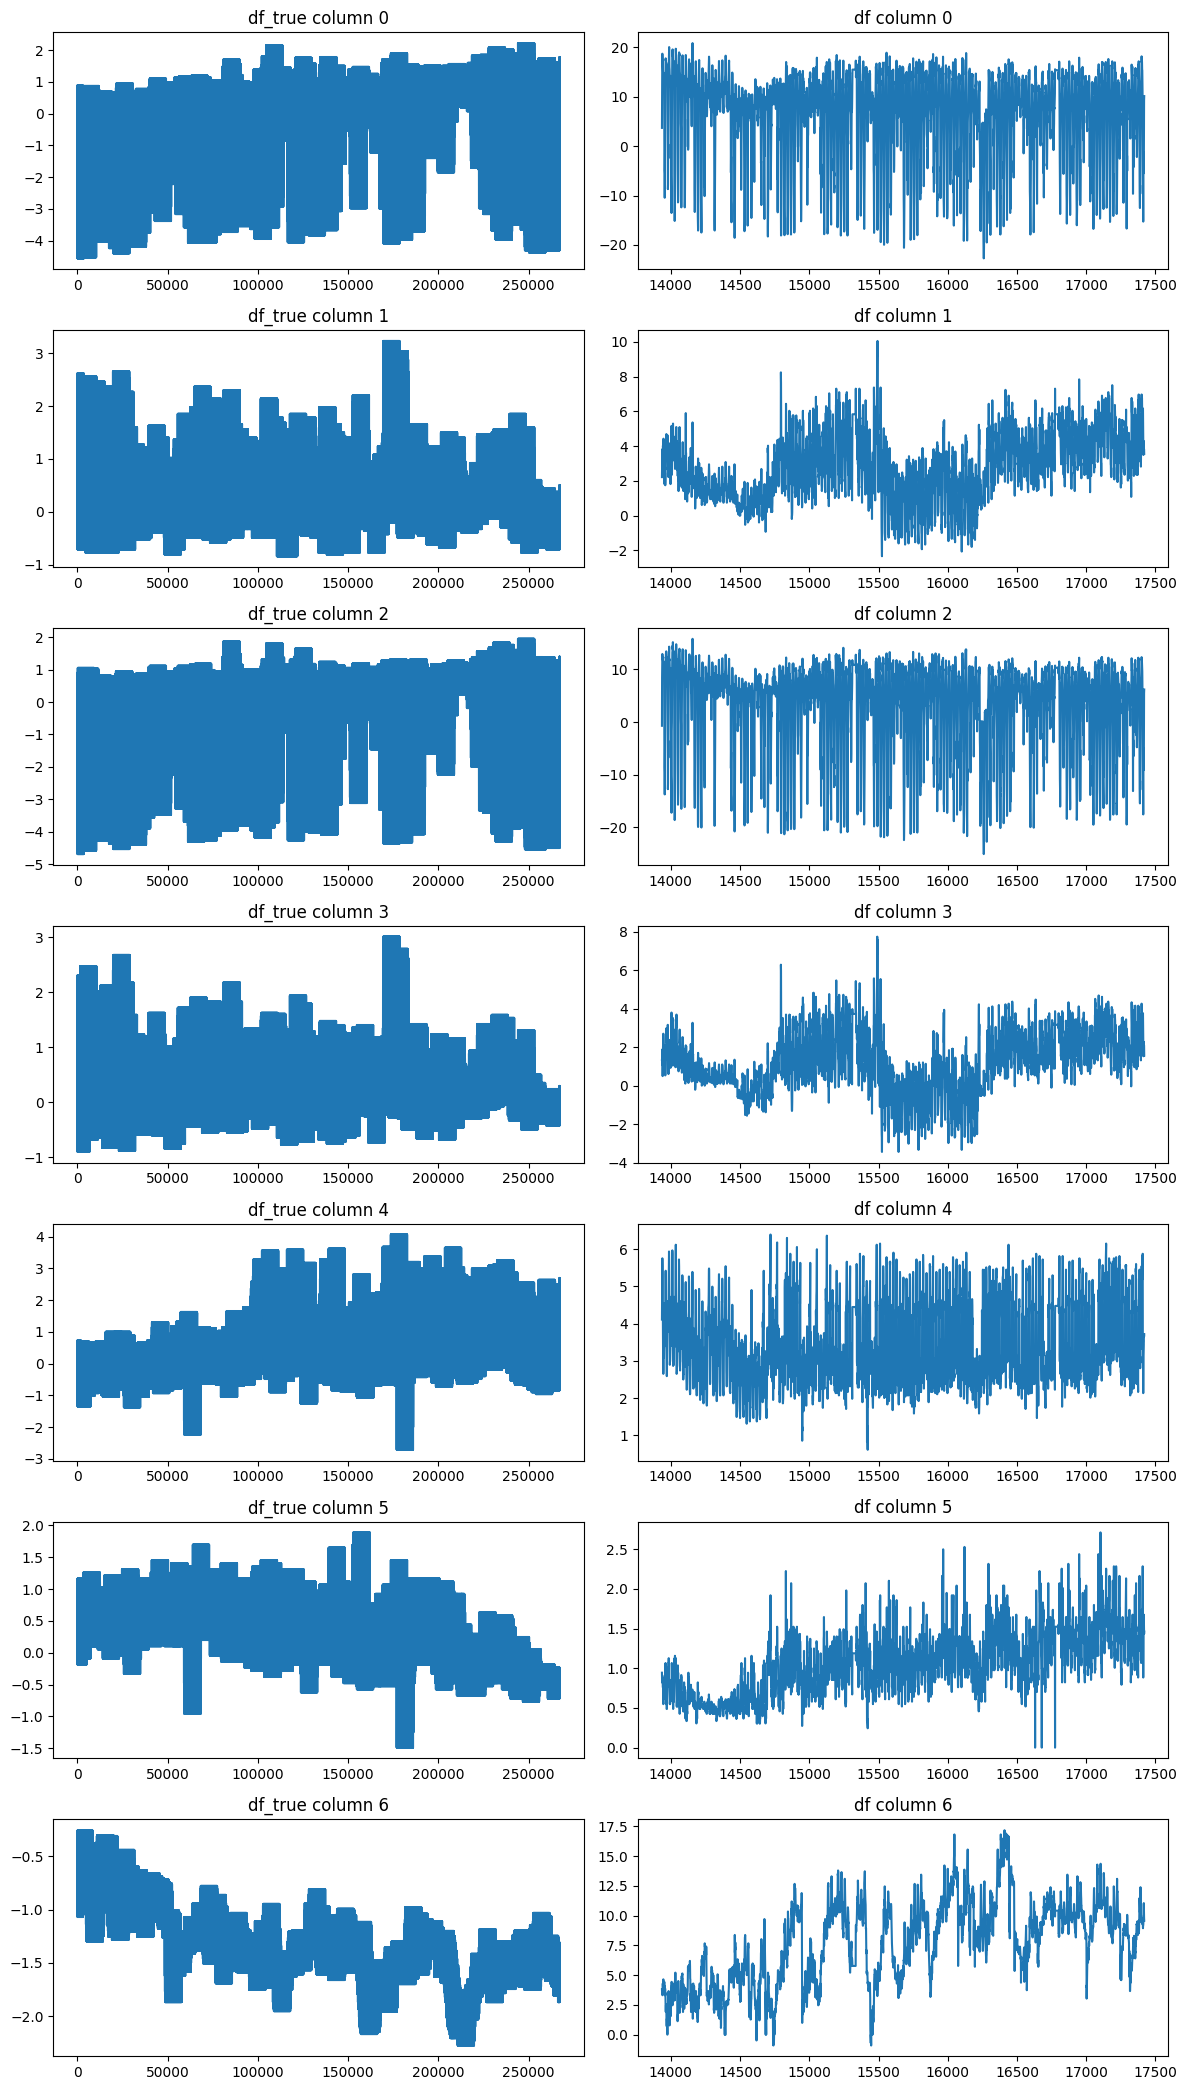

In [ ]:
for npy_path in ["/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/ETTh1_96_96_Linear_CD_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/true.npy"]:
    csv_path = npy_path.replace(".npy", ".csv")
    npy_to_csv(npy_path, csv_path)

df_true = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/ETTh1_96_96_Linear_CD_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/true.csv")
df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/ETTh1.csv")
#df = df.drop('date', axis=1)

#display(df.tail(n=10))

#df_true = df_true.iloc[-96:] 
#df = df.iloc[-150:] 

#df_true = df_true.iloc[:96] 
#df = df.iloc[:150] 

#df = df.iloc[int(len(df) * 0.8):]

# Number of columns in df_true (this decides the number of rows of subplots)
n_cols = df_true.shape[1]

# Create subplots: n_cols rows, 2 columns
fig, axes = plt.subplots(nrows=n_cols, ncols=2, figsize=(12, 3 * n_cols))

for i in range(n_cols):
    # Left: df_true
    axes[i, 0].plot(df_true.iloc[:, i])
    axes[i, 0].set_title(f"df_true column {i}")
    
    # Right: df
    axes[i, 1].plot(df.iloc[:, i+1])
    axes[i, 1].set_title(f"df column {i}")


plt.tight_layout()
plt.show()

,date,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,2002-01-01 00:00:00,1.22262,1.16668,582,805,2060,754,176569
1,2002-01-08 00:00:00,1.33344,1.21650,683,872,2267,785,186355
2,2002-01-15 00:00:00,1.31929,1.13057,642,878,2176,831,192469
3,2002-01-22 00:00:00,1.49484,1.25246,728,1045,2599,863,207512
4,2002-01-29 00:00:00,1.47195,1.30237,823,1189,2907,909,223208


,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,-0.830452,-0.815083,-0.523224,-0.571460,-0.552984,0.141570,0.441476
1,-0.866070,-0.831223,-0.603569,-0.586870,-0.588329,0.092024,0.384295
2,-0.838328,-0.814472,-0.574440,-0.628342,-0.596572,0.048489,0.385365
3,-0.824603,-0.773787,-0.520347,-0.592795,-0.574969,0.042244,0.414602
4,-0.803740,-0.735946,-0.465078,-0.649235,-0.590032,0.057916,0.397302


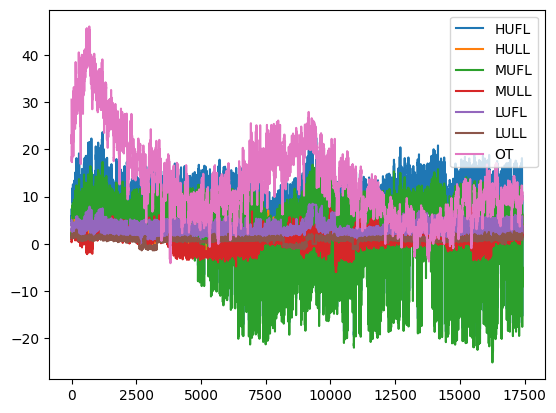

In [ ]:


df_ett = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/ETTh1.csv")
df_ili = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/national_illness.csv")

#df_pred = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/national_illness_104_24_Simon_Conv_custom_ftM_sl104_ll18_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/pred.csv")
df_pred = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/national_illness_104_24_DLinear_custom_ftM_sl104_ll18_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/pred.csv")
#df_pred = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/national_illness_104_24_DLinear_custom_ftM_sl104_ll18_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/real_prediction.csv")

"""
display(df_ett.head())
"""
display(df_ili.head())
display(df_pred.head())


plt.plot(df_ett['HUFL'], label='HUFL')
plt.plot(df_ett['HULL'], label='HULL')
plt.plot(df_ett['MUFL'], label='MUFL')
plt.plot(df_ett['MULL'], label='MULL')
plt.plot(df_ett['LUFL'], label='LUFL')
plt.plot(df_ett['LULL'], label='LULL')
plt.plot(df_ett['OT'], label='OT')

plt.legend()


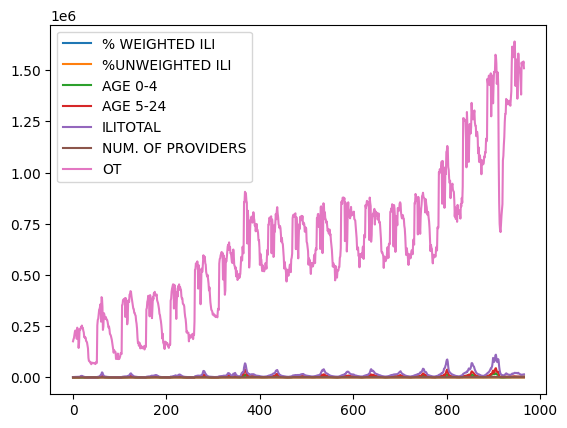

In [3]:
plt.plot(df_ili['% WEIGHTED ILI'], label='% WEIGHTED ILI')
plt.plot(df_ili['%UNWEIGHTED ILI'], label='%UNWEIGHTED ILI')
plt.plot(df_ili['AGE 0-4'], label='AGE 0-4')
plt.plot(df_ili['AGE 5-24'], label='AGE 5-24')
plt.plot(df_ili['ILITOTAL'], label='ILITOTAL')
plt.plot(df_ili['NUM. OF PROVIDERS'], label='NUM. OF PROVIDERS')
plt.plot(df_ili['OT'], label='OT')
plt.legend()

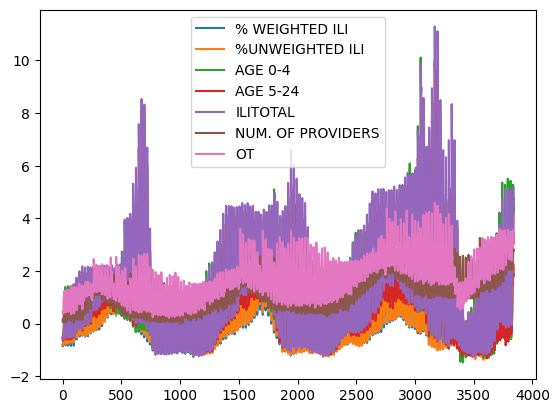

In [4]:
"""
plt.plot(df_pred['feature_0'], label='feature_0')
plt.plot(df_pred['feature_1'], label='feature_1')
plt.plot(df_pred['feature_2'], label='feature_2')
plt.plot(df_pred['feature_3'], label='feature_3')
plt.plot(df_pred['feature_4'], label='feature_4')
plt.plot(df_pred['feature_5'], label='feature_5')
plt.plot(df_pred['feature_6'], label='feature_6')
"""
plt.plot(df_pred['% WEIGHTED ILI'], label='% WEIGHTED ILI')
plt.plot(df_pred['%UNWEIGHTED ILI'], label='%UNWEIGHTED ILI')
plt.plot(df_pred['AGE 0-4'], label='AGE 0-4')
plt.plot(df_pred['AGE 5-24'], label='AGE 5-24')
plt.plot(df_pred['ILITOTAL'], label='ILITOTAL')
plt.plot(df_pred['NUM. OF PROVIDERS'], label='NUM. OF PROVIDERS')
plt.plot(df_pred['OT'], label='OT')
plt.legend()
plt.legend()

### Visualize datasets

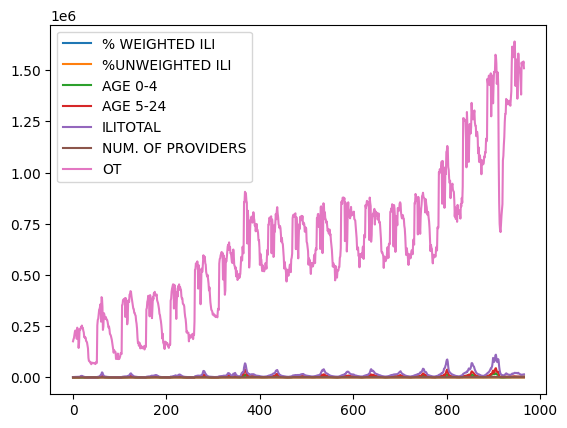

In [5]:
df_ili = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/national_illness.csv")

plt.plot(df_ili['% WEIGHTED ILI'], label='% WEIGHTED ILI')
plt.plot(df_ili['%UNWEIGHTED ILI'], label='%UNWEIGHTED ILI')
plt.plot(df_ili['AGE 0-4'], label='AGE 0-4')
plt.plot(df_ili['AGE 5-24'], label='AGE 5-24')
plt.plot(df_ili['ILITOTAL'], label='ILITOTAL')
plt.plot(df_ili['NUM. OF PROVIDERS'], label='NUM. OF PROVIDERS')
plt.plot(df_ili['OT'], label='OT')
plt.legend()